## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

##**Nome: Thalita Sousa**

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão (sim, vai ter) no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze4.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [41]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


##**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [42]:
df.describe()

,nsneeze,alcohol,antihist,smoker,age,pollen
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,44.586875,0.405000,0.242500,0.193750,32.138750,59.142035
std,143.814421,0.491046,0.428729,0.395359,12.000813,29.653766
min,0.000000,0.000000,0.000000,0.000000,18.000000,4.673025
25%,9.000000,0.000000,0.000000,0.000000,21.000000,37.331341
50%,18.000000,0.000000,0.000000,0.000000,31.000000,54.643810
75%,38.000000,1.000000,0.000000,0.000000,40.000000,74.703597
max,3897.000000,1.000000,1.000000,1.000000,74.000000,201.994822


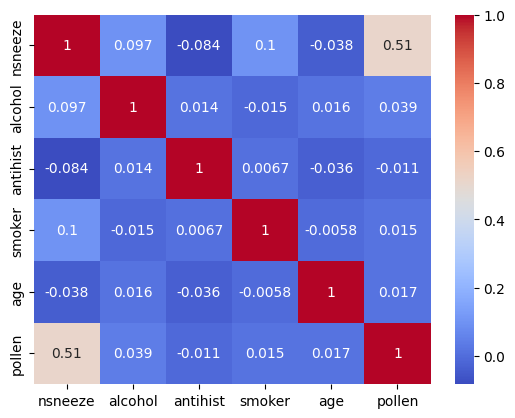

In [43]:
matriz_correlacao = df.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm")
plt.show()


Aqui notamos que o pollen e a quantidade de espirros são os mais correlacionados, e logo depois fumar

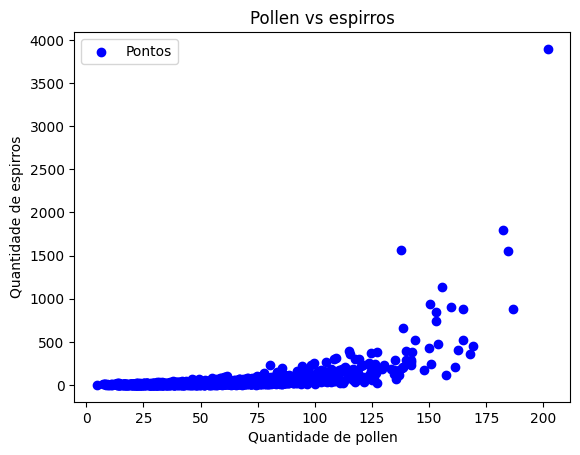

In [44]:
import matplotlib.pyplot as plt

x = df['pollen']
y = df['nsneeze']

plt.scatter(x, y, color='blue', label='Pontos')

plt.title('Pollen vs espirros')
plt.xlabel('Quantidade de pollen')
plt.ylabel('Quantidade de espirros')

plt.legend()
plt.show()

Reforçando a relação mencionada anteriormente, aumento de pollen e aumento de espirros

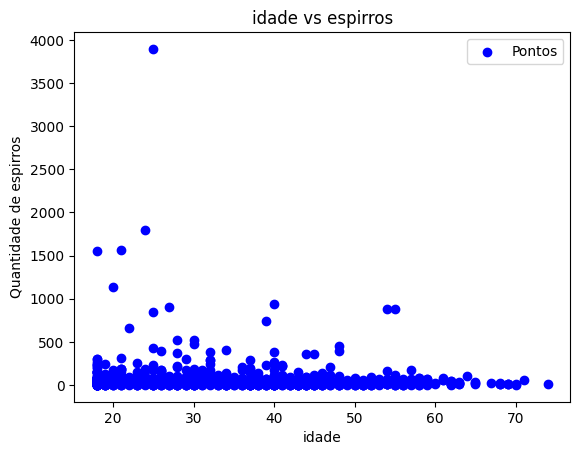

In [45]:
import matplotlib.pyplot as plt

x = df['age']
y = df['nsneeze']

plt.scatter(x, y, color='blue', label='Pontos')

plt.title('idade vs espirros')
plt.xlabel('idade')
plt.ylabel('Quantidade de espirros')

plt.legend()
plt.show()

Com o avanço da idade, notamos uma diminução na quantidade de espirros

<Figure size 700x500 with 0 Axes>

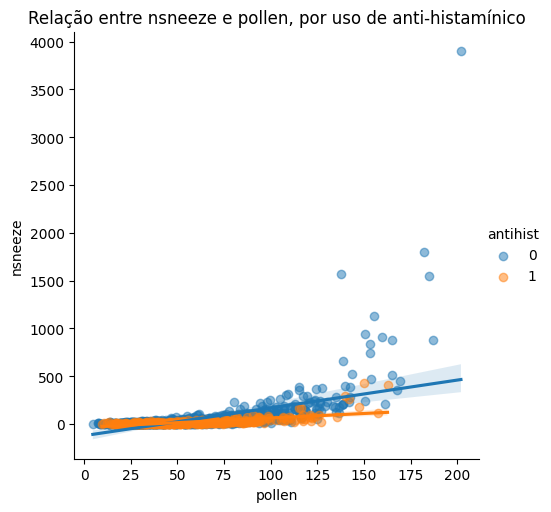

In [46]:
plt.figure(figsize=(7,5))
sns.lmplot(x='pollen', y='nsneeze', hue='antihist', data=df,
           scatter_kws={'alpha':0.5})
plt.title("Relação entre nsneeze e pollen, por uso de anti-histamínico")
plt.show()


aqui ainda notamos que o aumento de espirros cresce junto com o pollen, mas tambem percebemos uma linha mais inclinada para os individuos que não utilizam o remedio, sendo assim, mais afetados com maior quantidade de espirros.

<Figure size 700x500 with 0 Axes>

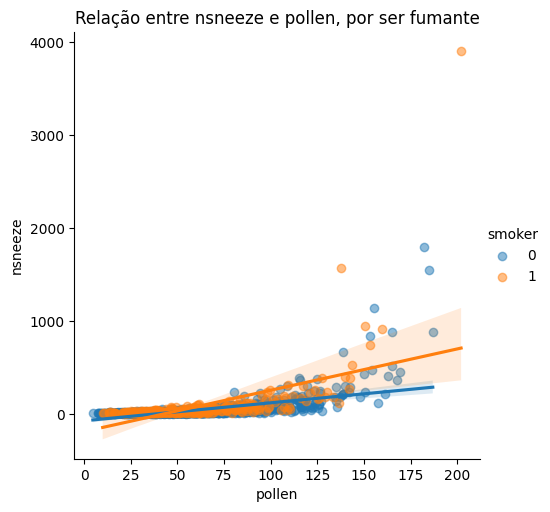

In [47]:
plt.figure(figsize=(7,5))
sns.lmplot(x='pollen', y='nsneeze', hue='smoker', data=df,
           scatter_kws={'alpha':0.5})
plt.title("Relação entre nsneeze e pollen, por ser fumante")
plt.show()

aqui notamos que o aumento de espirros cresce junto com o
pollen novamente, mas tambem percebemos que fumar não discrimina tanto quanto o remedio, sendo assim, não temos uma separação tão clara

<Figure size 700x500 with 0 Axes>

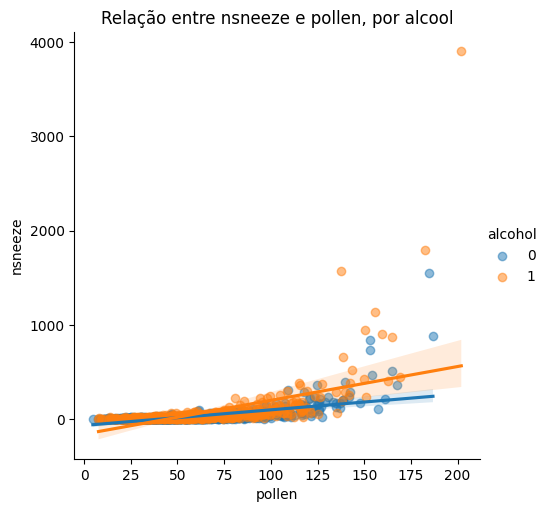

In [48]:
plt.figure(figsize=(7,5))
sns.lmplot(x='pollen', y='nsneeze', hue='alcohol', data=df,
           scatter_kws={'alpha':0.5})
plt.title("Relação entre nsneeze e pollen, por alcool")
plt.show()

comportamento muito parecido com o do cigarro. Pessoas que fazem uso do alcool parecem ser mais afetadas com uma maior quantidade de espirros, mas a discriminação não esta tão forte

##**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [49]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [50]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(formula=formula,data=df,family=sm.families.Poisson())

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Wed, 03 Dec 2025   Deviance:                       15064.
Time:                        18:40:00   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

In [51]:
print(np.exp(1.5002)) #Intercept
print(np.exp(0.4439)) #alcohol
print(np.exp(-0.6117)) #antihist
print(np.exp(0.4277)) #smoker
print(np.exp(-0.0127)) #age
print(np.exp(1.0324)) #pollen

4.48258549779189
1.5587746003677456
0.5424279572943541
1.5337258941747598
0.9873803046840219
2.8077964662294903


Intercepto: 4.48

alcohol: 1.56
Indivíduos que consumiram álcool nas últimas 24h têm, em média, 56% mais espirros do que quem não consumiu.
p < 0.001 sendo altamente significativo.

antihist: 0.543
Uso de anti-histamínico reduz o número de espirros em 46%, em média.
p < 0.001 sendo extremamente significativo.
Este é o efeito esperado de um rémedio.

smoker: 1.53
Fumantes apresentam 53% mais espirros, em média, do que não fumantes.
p < 0.001 sendo forte e significativo.

age: 0.987
Cada ano de idade reduz o número esperado de espirros em 1,3%.
p < 0.001 sendo estatisticamente significativo, embora pequeno.

pollen: 2.808
Cada unidade a mais de pólen aumenta 181% o número esperado de espirros
p < 0.001 sendo muito significativo.



##**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [52]:
deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid
disp_deviance = deviance / df_resid

print(f"Dispersão (Deviance/GL): {disp_deviance:.4f}")

residuos_pearson = ajuste_pois.resid_pearson
disp_pearson = np.sum(residuos_pearson**2) / df_resid

print(f"Dispersão (Pearson/GL): {disp_pearson:.4f}")


Dispersão (Deviance/GL): 9.4502
Dispersão (Pearson/GL): 9.9849


analisando a dispersão (Deviance) e (Pearson) em ambos temos superdispersão forte. Modelo Poisson não é adequado.

In [53]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

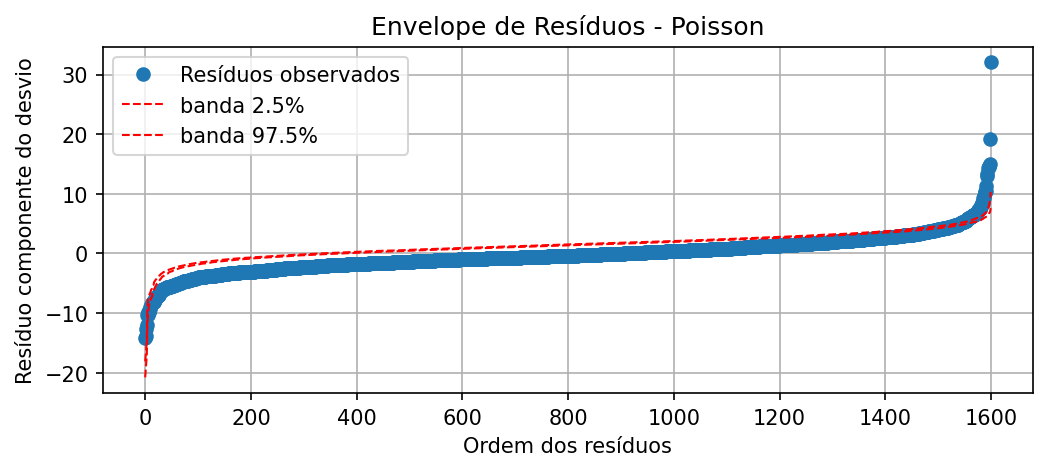

In [54]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

analisando o grafico de residuos, o ajuste tambem não está bom para a poisson

## **4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [55]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2 (valores gerados a partir desse alpha)

modelo_nb = smf.glm(formula=formula,data=df,family=sm.families.NegativeBinomial(alpha=alpha_fixado))

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Wed, 03 Dec 2025   Deviance:                       1785.6
Time:                        18:40:01   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4703      0.047  

In [56]:

#Modelo Poisson

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
modelo_pois = smf.glm(formula=formula,data=df,family=sm.families.Poisson())

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Wed, 03 Dec 2025   Deviance:                       15064.
Time:                        18:40:01   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

In [77]:
#Comparando Deviance e AIC
print(f"AIC Poisson: {ajuste_pois.aic:.4f}")
print(f"Deviance Poisson: {ajuste_pois.deviance:.4f}")

print(f"AIC Binomial Negativa: {ajuste_nb.aic:.4f}")
print(f"Deviance Binomial Negativa: {ajuste_nb.deviance:.4f}")

AIC Poisson: 18513.2043
Deviance Poisson: 12401.5447
AIC Binomial Negativa: 9693.7773
Deviance Binomial Negativa: 1430.5051


O deviance da Binomial Negativa foi menor do que o do Poisson.
Ambos os modelos estão com o intercepto, mas a Binomial Negativa tem um parametro a mais e apresentou AIC menor tambem.

A Binomial Negativa é claramente superior, tanto pelo ajuste (deviance) quanto pelo critério de informação (AIC).

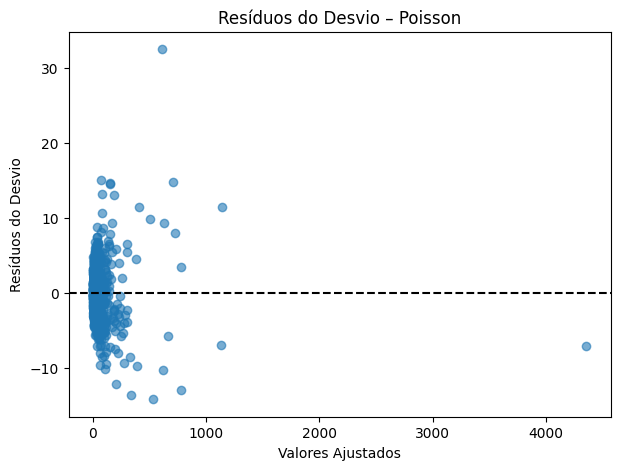

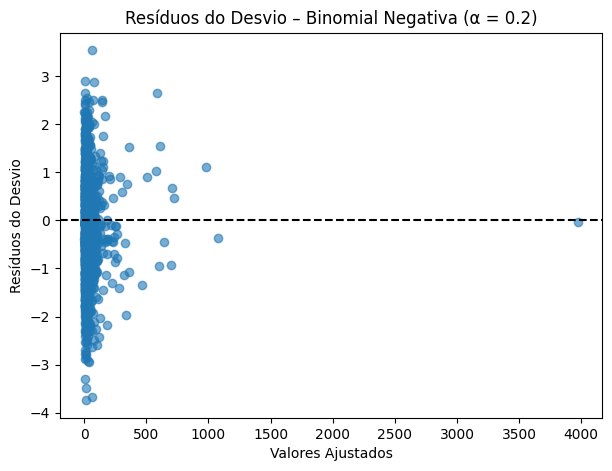

In [75]:
#Gráficos dos resíduos
def grafico_residuos(ajuste, titulo):
    residuos = ajuste.resid_deviance
    ajuste_pred = ajuste.fittedvalues

    plt.figure(figsize=(7, 5))
    plt.scatter(ajuste_pred, residuos, alpha=0.6)
    plt.axhline(0, linestyle='--', color='black')
    plt.xlabel("Valores Ajustados")
    plt.ylabel("Resíduos do Desvio")
    plt.title(titulo)
    plt.show()

grafico_residuos(ajuste_pois, "Resíduos do Desvio – Poisson")
grafico_residuos(ajuste_nb, "Resíduos do Desvio – Binomial Negativa (α = 0.2)")

No modelo Poisson, os resíduos mostram maior dispersão e outliers.

Na Binomial Negativa, os resíduos ficam mais homogêneos e mais próximos de zero.



##**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [72]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


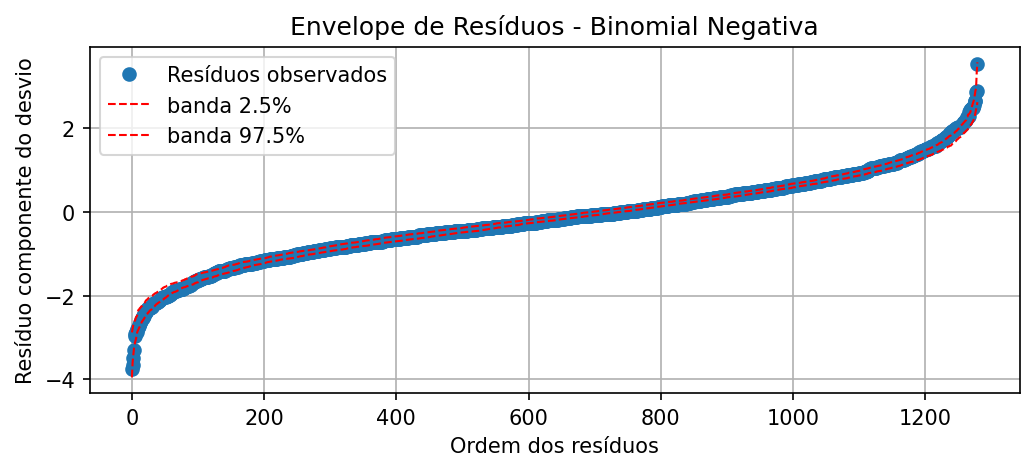

In [73]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

Neste grafico notamos que o ajuste está melhor que o da Possion

In [69]:
efeitos = ajuste_nb.get_margeff(at='overall')
print(efeitos.summary_frame().loc[['C(alcohol)[T.1]', 'C(antihist)[T.1]']])

                      dy/dx  Std. Err.          z      Pr(>|z|)  \
C(alcohol)[T.1]   18.519040   1.386491  13.356769  1.081580e-40   
C(antihist)[T.1] -22.165997   1.650534 -13.429588  4.056638e-41   

                  Conf. Int. Low  Cont. Int. Hi.  
C(alcohol)[T.1]        15.801567       21.236512  
C(antihist)[T.1]      -25.400986      -18.931009  


Consumo de álcool (alcohol) 18.52.

Podemos concluir que em média, indivíduos que consomem álcool apresentam 18.52 espirros a mais do que os que não consomem, mantendo todas as demais variáveis constantes.

Uso de anti-histamínico (antihist) –22.2.

Indivíduos que usam anti-histamínicos apresentam 22.2 espirros a menos do que os que não usam, mantendo todas as demais variáveis constantes.

##**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [62]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [63]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Modelo Poisson
modelo_pois = smf.glm(formula=formula, data=train_df, family=sm.families.Poisson())
ajuste_pois = modelo_pois.fit()

# Modelo Binomial Negativa com alpha fixado = 0.2
alpha_fixado = 0.2
modelo_nb = smf.glm(formula=formula,data=train_df,family=sm.families.NegativeBinomial(alpha=alpha_fixado))
ajuste_nb = modelo_nb.fit()

In [64]:
pred_pois = ajuste_pois.predict(test_df)
pred_nb = ajuste_nb.predict(test_df)

In [71]:
y_true = test_df["nsneeze"].values

# Poisson
EQM_pois = np.mean((y_true - pred_pois)**2)
EAM_pois = np.mean(np.abs(y_true - pred_pois))

# Binomial Negativa
EQM_nb = np.mean((y_true - pred_nb)**2)
EAM_nb = np.mean(np.abs(y_true - pred_nb))


print(f"EQM Poisson:{EQM_pois:.4f}")
print(f"EAM Poisson:{EAM_pois:.4f}")
print(f"EQM Binomial Negativa:{EQM_nb:.4f}")
print(f"EAM Binomial Negativa:{EAM_nb:.4f}")


EQM Poisson:1370.5488
EAM Poisson:14.7061
EQM Binomial Negativa:1942.3718
EAM Binomial Negativa:15.2078


A Poisson tem EQM bem menor, então teve melhor desempenho preditivo quando avaliamos o EQM.
A Poisson também foi melhor no EAM, embora a diferença seja pequena.

Concluimos que para prever, a poisson acaba sendo melhor

Embora a Binomial Negativa apresente melhor ajuste global segundo deviance e AIC, o que indica maior adequação à estrutura dos dados e maior flexibilidade para lidar com sobredispersão, sua performance preditiva foi inferior à Poisson. As métricas de erro preditivo (EQM e EAM) mostraram valores menores para o modelo Poisson, indicando que, apesar de ser um modelo mais simples e restritivo, ele forneceu previsões pontuais mais próximas dos valores observados.

Em outras palavras, a Binomial Negativa descreve melhor a distribuição dos dados, mas o modelo Poisson gera previsões mais precisas em termos de erro médio. Isso destaca uma distinção importante entre qualidade de ajuste e desempenho preditivo: um modelo estatisticamente mais adequado pode nem sempre ser o melhor para previsão pontual.

##**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração. (valor minimo)

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração. (valor maximo)

In [66]:
ajuste_nb = modelo_nb.fit()

In [70]:

pollen_min = 0
pollen_max = df["pollen"].max()

A=pd.DataFrame({"alcohol":[0],"antihist":[1],"smoker":[0],"age":[30],"pollen":[pollen_min]})
B=pd.DataFrame({"alcohol":[1],"antihist":[0],"smoker":[1],"age":[50],"pollen":[pollen_max]})

pred_A = ajuste_nb.predict(A)[0]
pred_B = ajuste_nb.predict(B)[0]

print(f"A Previsão (espirros esperados):{pred_A:.3f}")
print(f"B Previsão (espirros esperados):{pred_B:.3f}")

A Previsão (espirros esperados):1.881
B Previsão (espirros esperados):3084.724


Temos aqui dois individuos em extremos opostos, um com um cenario perfeito para ter muitos espirros e o outro não.

Como esperado e visto ao longo da atividade, o individuo A quase não sofre com espirros e o individuo B foi extremamente afetado.